In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes_dataset.csv")

df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Data Cleaning

In [4]:
# Missing value
df.isnull().sum()



Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
# Duplicated value
print("\nNumber of duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Number of duplicates: 23899


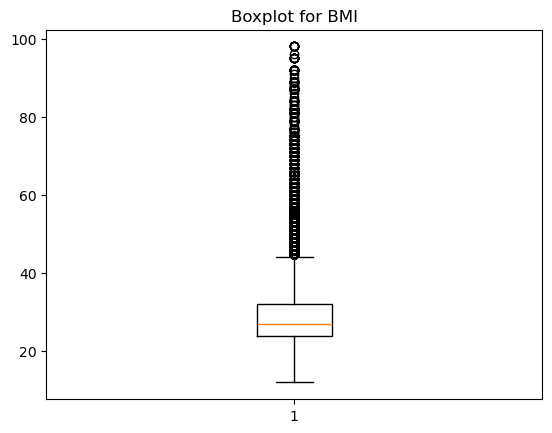

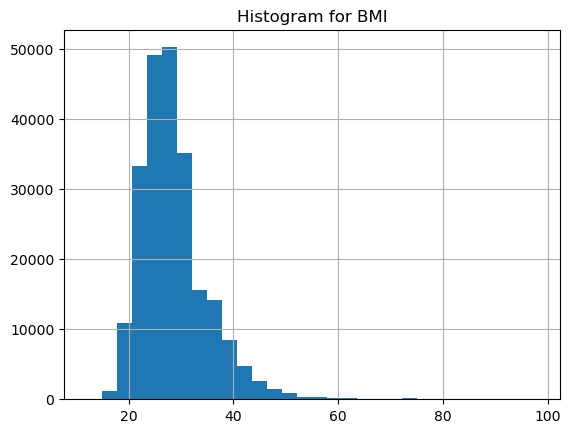

In [6]:
import matplotlib.pyplot as plt

# Boxplot
plt.boxplot(df['BMI'])
plt.title("Boxplot for BMI")
plt.show()

# Histogram
df['BMI'].hist(bins=30)
plt.title("Histogram for BMI")
plt.show()


In [7]:
import pandas as pd

# Example: detect outliers in BMI column
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print("Number of outliers:", len(outliers))
# Keep only rows within the bounds
df2 = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]



Number of outliers: 5638


In [8]:
df2

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# Data Preprocessing

In [9]:
df2['Diabetes_012'].value_counts(normalize=True)*100

Diabetes_012
0.0    83.245517
2.0    14.767804
1.0     1.986678
Name: proportion, dtype: float64

In [10]:
df2['Diabetes_012'].value_counts()

Diabetes_012
0.0    186589
2.0     33101
1.0      4453
Name: count, dtype: int64

In [11]:
# For binary classification, we'll combine prediabetes and diabetes (classes 1 and 2)
df2['Diabetes_binary'] = df2['Diabetes_012'].apply(lambda x: 1 if x >= 1 else 0)

# Verify new target distribution
print("New binary target distribution:")
print(df2['Diabetes_binary'].value_counts())


New binary target distribution:
Diabetes_binary
0    186589
1     37554
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_12116\1027725055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Diabetes_binary'] = df2['Diabetes_012'].apply(lambda x: 1 if x >= 1 else 0)


<function matplotlib.pyplot.show(close=None, block=None)>

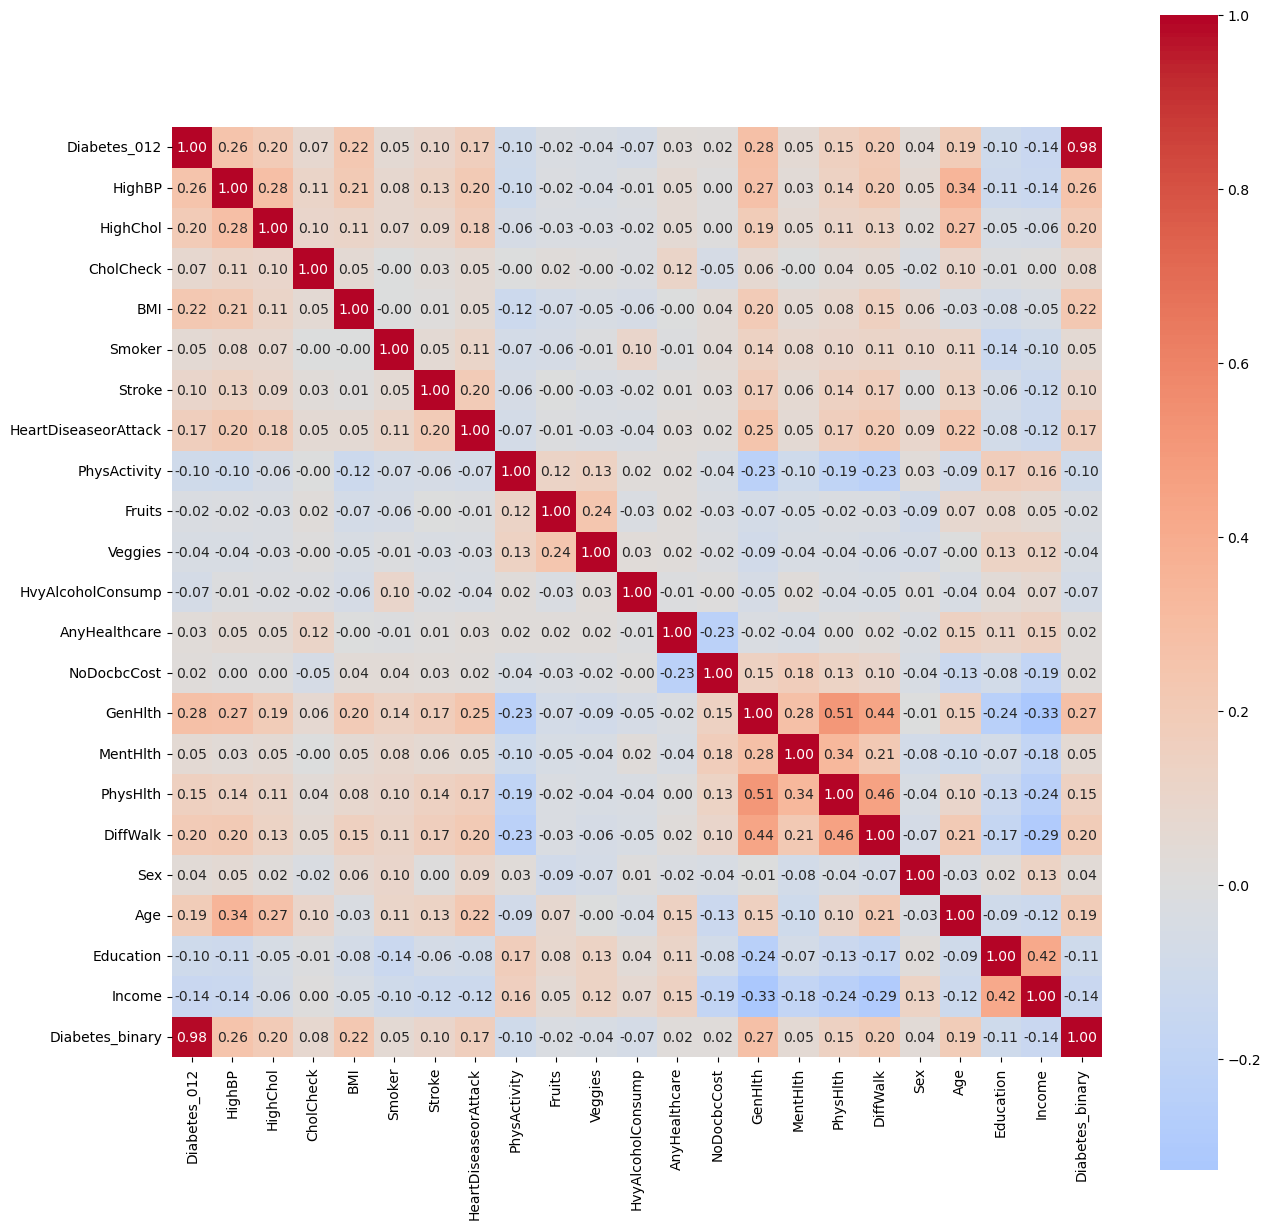

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0, cmap='coolwarm', fmt=".2f", square=True)
plt.show

In [13]:
# 取目標欄位（target）對所有特徵的相關係數
target_corr = df.select_dtypes(include=['int', 'float']).corr()['Diabetes_012'].drop('Diabetes_012')

# 將結果由大到小排序
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# 印出相關係數
for feature in target_corr_sorted.index:
    print(f"{feature}: {df.select_dtypes(include=['int', 'float']).corr().loc[feature, 'Diabetes_012']:.3f}")

GenHlth: 0.285
HighBP: 0.262
BMI: 0.212
DiffWalk: 0.211
HighChol: 0.203
Age: 0.185
HeartDiseaseorAttack: 0.171
PhysHlth: 0.160
Income: -0.147
Education: -0.108
PhysActivity: -0.103
Stroke: 0.100
CholCheck: 0.076
HvyAlcoholConsump: -0.067
MentHlth: 0.058
Smoker: 0.047
Veggies: -0.043
Sex: 0.032
Fruits: -0.025
AnyHealthcare: 0.025
NoDocbcCost: 0.024


In [14]:
# Features = all columns except target
X = df2.drop(["Diabetes_012", "Diabetes_binary"], axis=1)

# Target = Diabetes_012 column
y = df2["Diabetes_binary"]



In [15]:
!pip install xgboost


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:59:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[26026 11292]
 [ 1763  5748]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     37318
           1       0.34      0.77      0.47      7511

    accuracy                           0.71     44829
   macro avg       0.64      0.73      0.63     44829
weighted avg       0.84      0.71      0.74     44829



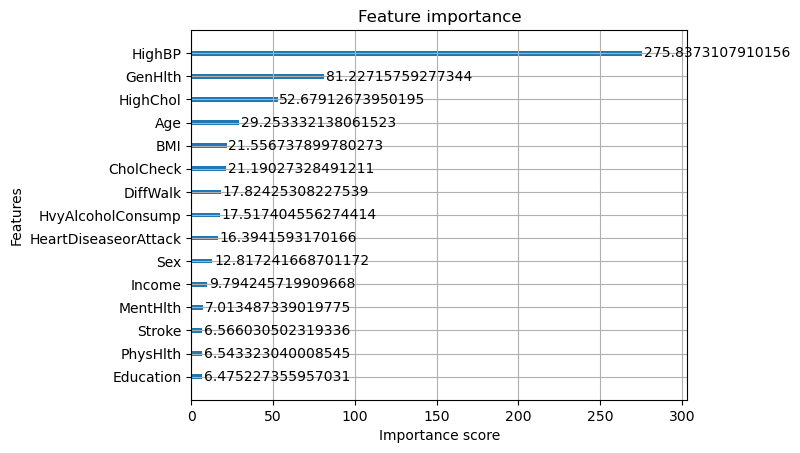

                 Feature  Importance (Gain)
0                 HighBP         275.837311
1                GenHlth          81.227158
2               HighChol          52.679127
3                    Age          29.253332
4                    BMI          21.556738
5              CholCheck          21.190273
6               DiffWalk          17.824253
7      HvyAlcoholConsump          17.517405
8   HeartDiseaseorAttack          16.394159
9                    Sex          12.817242
10                Income           9.794246
11              MentHlth           7.013487
12                Stroke           6.566031
13              PhysHlth           6.543323
14             Education           6.475227


,Feature,Importance (Gain)
0,HighBP,275.837311
1,GenHlth,81.227158
2,HighChol,52.679127
3,Age,29.253332
4,BMI,21.556738
5,CholCheck,21.190273
6,DiffWalk,17.824253
7,HvyAlcoholConsump,17.517405
8,HeartDiseaseorAttack,16.394159
9,Sex,12.817242


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

class_counts = y_train.value_counts().to_dict()
total = len(y_train)
class_weights = {cls: total/count for cls, count in class_counts.items()}

weights = [class_weights[cls] for cls in sorted(class_counts.keys())]

model = xgb.XGBClassifier(
    objective="multi:softmax",   # multi-class classification
    num_class=len(class_counts), # number of target classes
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=None,       # not used in multi-class
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)

# Fit model with sample weights
sample_weights = y_train.map(class_weights)
model.fit(X_train, y_train, sample_weight=sample_weights)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

xgb.plot_importance(model, importance_type='gain', max_num_features=15)
plt.show()

import pandas as pd

# Get feature importance scores
importance = model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance (Gain)': list(importance.values())
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance (Gain)', ascending=False).reset_index(drop=True)

print(importance_df.head(15))  # top 15 features

# If you want to display full table in Jupyter / Colab:
from IPython.display import display
display(importance_df)


In [17]:
conda update scikit-learn


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.7.0




# XGBoost

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# ------------------------------------
# 1. Select features
# ------------------------------------
selected_features = [
    "HighBP", "GenHlth", "HighChol", "Age", "DiffWalk", "BMI",
    "HeartDiseaseorAttack", "HvyAlcoholConsump", "PhysActivity",
    "Smoker", "Fruits", "Veggies"
]

X = df2[selected_features]
y = df2["Diabetes_binary"]  # <-- new binary target

# ------------------------------------
# 2. Stratified Train-Test Split
# ------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Original training distribution:\n", y_train.value_counts())

# ------------------------------------
# 3A. Approach A - Class Weights
# ------------------------------------
class_counts = y_train.value_counts()
total = len(y_train)
class_weights = {cls: total/count for cls, count in class_counts.items()}
print("\nClass Weights:", class_weights)

sample_weights = y_train.map(class_weights)

model_weights = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)

model_weights.fit(X_train, y_train, sample_weight=sample_weights)

y_pred_w = model_weights.predict(X_test)
print("\n===== Results with Class Weights =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_w))
print("\nClassification Report:\n", classification_report(y_test, y_pred_w))

# ------------------------------------
# 3B. Approach B - SMOTE
# ------------------------------------
# Oversample only the minority class (1 = at-risk)
sm = SMOTE(random_state=42, sampling_strategy=0.5)  # 50% of majority class
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE distribution:\n", y_train_res.value_counts())

model_smote = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)

model_smote.fit(X_train_res, y_train_res)

y_pred_s = model_smote.predict(X_test)
print("\n===== Results with SMOTE =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_s))
print("\nClassification Report:\n", classification_report(y_test, y_pred_s))


Original training distribution:
 Diabetes_binary
0    149271
1     30043
Name: count, dtype: int64

Class Weights: {0: 1.2012648136610593, 1: 5.9685783710015645}

===== Results with Class Weights =====
Confusion Matrix:
 [[25838 11480]
 [ 1778  5733]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.69      0.80     37318
           1       0.33      0.76      0.46      7511

    accuracy                           0.70     44829
   macro avg       0.63      0.73      0.63     44829
weighted avg       0.83      0.70      0.74     44829


After SMOTE distribution:
 Diabetes_binary
0    149271
1     74635
Name: count, dtype: int64

===== Results with SMOTE =====
Confusion Matrix:
 [[35334  1984]
 [ 5454  2057]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.90     37318
           1       0.51      0.27      0.36      7511

    accuracy                   

# Random Forest

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# ------------------------------------
# 1. Select features
# ------------------------------------
selected_features = [
    "HighBP", "GenHlth", "HighChol", "Age", "DiffWalk", "BMI",
    "HeartDiseaseorAttack", "HvyAlcoholConsump", "PhysActivity",
    "Smoker", "Fruits", "Veggies"
]

X = df[selected_features]
y = df["Diabetes_binary"]

# ------------------------------------
# 2. Stratified Train-Test Split
# ------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Original training distribution:\n", y_train.value_counts())

# ------------------------------------
# 3A. Approach A - Class Weights
# ------------------------------------
class_counts = y_train.value_counts()
total = len(y_train)
class_weights = {0: total/class_counts[0], 1: total/class_counts[1]}
print("\nClass Weights:", class_weights)

rf_weights = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight=class_weights,
    n_jobs=-1
)

rf_weights.fit(X_train, y_train)

y_pred_w = rf_weights.predict(X_test)

print("\n===== Results with Class Weights =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_w))
print("\nClassification Report:\n", classification_report(y_test, y_pred_w))

# Feature importance
importances = rf_weights.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance (Class Weights):\n", feature_importance_df)

# ------------------------------------
# 3B. Approach B - SMOTE
# ------------------------------------
sm = SMOTE(random_state=42, sampling_strategy=0.5)  # oversample minority to 50% of majority
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE distribution:\n", y_train_res.value_counts())

rf_smote = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_smote.fit(X_train_res, y_train_res)

y_pred_s = rf_smote.predict(X_test)

print("\n===== Results with SMOTE =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_s))
print("\nClassification Report:\n", classification_report(y_test, y_pred_s))

# Feature importance
importances_s = rf_smote.feature_importances_
feature_importance_df_s = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances_s
}).sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance (SMOTE):\n", feature_importance_df_s)


KeyError: 'Diabetes_binary'

# XGBoost with hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import time

# ------------------------------------
# 1. Select features
# ------------------------------------
selected_features = [
    "HighBP", "GenHlth", "HighChol", "Age", "DiffWalk", "BMI",
    "HeartDiseaseorAttack", "HvyAlcoholConsump", "PhysActivity",
    "Smoker", "Fruits", "Veggies"
]

X = df[selected_features]
y = df["Diabetes_binary"]

# ------------------------------------
# 2. Stratified Train-Test Split
# ------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------
# 3. Compute Class Weights
# ------------------------------------
class_counts = y_train.value_counts()
total = len(y_train)
class_weights = {0: total/class_counts[0], 1: total/class_counts[1]}
sample_weights = y_train.map(class_weights)

# ------------------------------------
# 4. Define XGBoost model
# ------------------------------------
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# ------------------------------------
# 5. Define Hyperparameter Space
# ------------------------------------
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# ------------------------------------
# 6. Stratified K-Fold
# ------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------------
# 7. RandomizedSearchCV
# ------------------------------------
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # number of parameter settings to try
    scoring='f1',  # optimize F1-score
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# ------------------------------------
# 8. Fit RandomizedSearchCV
# ------------------------------------
start_time = time.time()
random_search.fit(X_train, y_train, sample_weight=sample_weights)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTime taken for RandomizedSearchCV: {elapsed_time:.2f} seconds ({elapsed_time/60:.2f} minutes)")
# ------------------------------------
# 9. Best Parameters and Model
# ------------------------------------
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

# ------------------------------------
# 10. Evaluate on Test Set
# ------------------------------------
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------------
# 11. Feature Importance
# ------------------------------------
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance_df)


# Random Forest with hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# ------------------------------------
# 1. Select features
# ------------------------------------
selected_features = [
    "HighBP", "GenHlth", "HighChol", "Age", "DiffWalk", "BMI",
    "HeartDiseaseorAttack", "HvyAlcoholConsump", "PhysActivity",
    "Smoker", "Fruits", "Veggies"
]

X = df[selected_features]
y = df["Diabetes_binary"]

# ------------------------------------
# 2. Stratified Train-Test Split
# ------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------
# 3. Compute Class Weights
# ------------------------------------
class_counts = y_train.value_counts()
total = len(y_train)
class_weights = {0: total/class_counts[0], 1: total/class_counts[1]}

# ------------------------------------
# 4. Define Random Forest model
# ------------------------------------
rf_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight=class_weights
)

# ------------------------------------
# 5. Define Hyperparameter Space
# ------------------------------------
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', 0.5, 0.7, None],
    'bootstrap': [True, False]
}

# ------------------------------------
# 6. Stratified K-Fold
# ------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------------
# 7. RandomizedSearchCV
# ------------------------------------
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=30,  # try 30 random combinations
    scoring='f1',  # optimize F1-score
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# ------------------------------------
# 8. Fit RandomizedSearchCV and measure time
# ------------------------------------
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTime taken for RandomizedSearchCV: {elapsed_time:.2f} seconds ({elapsed_time/60:.2f} minutes)")

# ------------------------------------
# 9. Best Parameters and Model
# ------------------------------------
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

# ------------------------------------
# 10. Evaluate on Test Set
# ------------------------------------
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------------
# 11. Feature Importance
# ------------------------------------
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance_df)
